In [ ]:
# Importing Libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from impyute.imputation.cs import mice
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import datawig
from impyute.imputation.cs import fast_knn

In [6]:
# Loading Dataset 

dataset_df_aux = pd.read_csv('/Users/dharnashukla/Desktop/DNA_methylation.csv')
dataset_df_main = pd.read_csv('/Users/dharnashukla/Desktop/RNA_seq.csv')

# Merging the Dataset
dataset = pd.merge(dataset_df_main, dataset_df_aux, on='id')

#Pandas: whats the data row count?
print(dataset.shape)
    
#Pandas: whats the distribution of the data?
print(dataset.describe())
    
#Pandas: What types of data do i have?
print(dataset.info())


(150, 41)
           KNDC1       QPRT       BRDT      MYO1G     LGALS4       XIST  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    6.024421   8.649782   2.904542   8.776129   4.756847   8.050437   
std     2.123663   1.741013   3.347731   1.370279   3.796476   5.188908   
min     0.000000   4.768700   0.000000   5.091900   0.000000   0.000000   
25%     4.945775   7.118725   0.000000   7.907550   2.173075   2.657800   
50%     6.152550   8.945350   1.526550   8.862250   3.431000  10.624050   
75%     7.537475  10.364875   5.968450   9.707800   6.216925  12.545725   
max     9.700200  11.246800  10.153200  11.813700  14.070300  14.683800   

           SPRY2     PRDM16       SLA2     ZNF418     ...      cg20741386  \
count  62.000000  62.000000  62.000000  62.000000     ...      150.000000   
mean    9.177877   7.295458   6.047095   5.316329     ...        0.727196   
std     0.939739   2.008366   1.181416   1.224397     ...        0.117681   
min   

In [7]:
# drop missing data rows
orig_dataset = dataset.dropna()

In [4]:
#missing data

total = orig_dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/orig_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)


            Total   Percent
ALPK3           0  1.419355
BHMT2           0  1.419355
BRDT            0  1.419355
C3orf30         0  1.419355
DDX43           0  1.419355
ENO3            0  1.419355
HOXB13          0  1.419355
KNDC1           0  1.419355
LGALS4          0  1.419355
MYO1G           0  1.419355
OLFM1           0  1.419355
PRDM16          0  1.419355
QPRT            0  1.419355
SDR42E1         0  1.419355
SLA2            0  1.419355
SPRY2           0  1.419355
TMEM108         0  1.419355
XIST            0  1.419355
ZNF418          0  1.419355
ZNF597          0  1.419355
cg00706913      0  0.000000
cg02448597      0  0.000000
cg02640604      0  0.000000
cg06022562      0  0.000000
cg06617975      0  0.000000
cg07956247      0  0.000000
cg10542975      0  0.000000
cg12653510      0  0.000000
cg13831216      0  0.000000
cg14140379      0  0.000000
cg14323984      0  0.000000
cg14853341      0  0.000000
cg19974994      0  0.000000
cg20301593      0  0.000000
cg20741386      0  0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


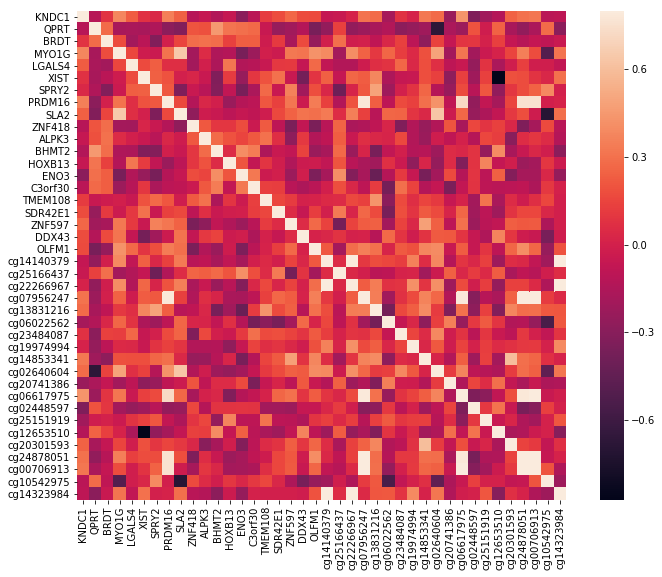

In [5]:
#correlation matrix

import seaborn as sns
corrmat = orig_dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [17]:
#Dropping non-numeric column

orig_dataset = orig_dataset.drop(['id'], axis= 1)
orig_dataset = orig_dataset.reset_index(drop = True)


In [7]:
# Introducing  50% random Nan values in the dataset

unimputed_dataset_50 = orig_dataset.reset_index(drop = True) 

for col in unimputed_dataset_50:
    ori_rat = unimputed_dataset_50[col].isna().mean()

    if ori_rat >= 0.5: continue

    add_miss_rat = (0.5 - ori_rat) / (1 - ori_rat)
    vals_to_nan = unimputed_dataset_50[col].dropna().sample(frac=add_miss_rat).index
    unimputed_dataset_50.loc[vals_to_nan, col] = np.NaN


In [8]:
# To check dataset has missing values

total =  unimputed_dataset_50.isnull().sum().sort_values(ascending=False)
percent = (unimputed_dataset_50.isnull().sum()/ unimputed_dataset_50.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)


            Total  Percent
cg14323984     31      0.5
cg10542975     31      0.5
ZNF597         31      0.5
SDR42E1        31      0.5
TMEM108        31      0.5
C3orf30        31      0.5
ENO3           31      0.5
HOXB13         31      0.5
BHMT2          31      0.5
ALPK3          31      0.5
ZNF418         31      0.5
SLA2           31      0.5
PRDM16         31      0.5
SPRY2          31      0.5
XIST           31      0.5
LGALS4         31      0.5
MYO1G          31      0.5
BRDT           31      0.5
QPRT           31      0.5
DDX43          31      0.5
OLFM1          31      0.5
cg14140379     31      0.5
cg20741386     31      0.5
cg00706913     31      0.5
cg24878051     31      0.5
cg20301593     31      0.5
cg12653510     31      0.5
cg25151919     31      0.5
cg02448597     31      0.5
cg06617975     31      0.5
cg02640604     31      0.5
cg25166437     31      0.5
cg14853341     31      0.5
cg19974994     31      0.5
cg23484087     31      0.5
cg06022562     31      0.5
c

In [9]:
# imputation using mean

def mean_imputation(unimputed_dataset):
    imp_mean = SimpleImputer( strategy='mean') 
    imp_mean.fit(unimputed_dataset)
    imputed_df_mean = imp_mean.transform(unimputed_dataset)
    return imputed_df_mean

In [10]:
# imputation using median

def median_imputation(unimputed_dataset): 
    imp_mean = SimpleImputer(strategy='median')
    imp_mean.fit(unimputed_dataset)
    imputed_df_median = imp_mean.transform(unimputed_dataset)
    return imputed_df_median

In [11]:
# Imputation Using (Most Frequent) or (Zero/Constant) Values

def most_frequent_imputation(unimputed_dataset):
    imp_mean = SimpleImputer( strategy='most_frequent')
    imp_mean.fit(unimputed_dataset)
    imputed_df_mf = imp_mean.transform(unimputed_dataset)
    return imputed_df_mf

In [12]:
# Imputation Using Multivariate Imputation by Chained Equation (MICE)

def mice_imputation(unimputed_dataset): 
    imputed_df_mice = mice(unimputed_dataset)
    return imputed_df_mice

In [13]:
# finding optimal value of K

def knn(orig,unimputed_dataset):
    rel_errors = []
    abs_errors = []
    neigbhors = []
    
    unimput = unimputed_dataset
    orig_dataset = orig

    for i in range(1,50):
        imputed_training_KNN=fast_knn(unimputed_dataset, k=i)
        error_relative = RelativeError(orig_dataset,imputed_training_KNN)
        error_absolute = AbsoluteError(orig_dataset,imputed_training_KNN)
        rel_errors.append(error_relative)
        abs_errors.append(error_absolute)
        neigbhors.append(i)
        
    # finding K value with respect to relative error and absolute error   
    
    min_error = min(rel_errors)
    for i in range(len(rel_errors)):
        if rel_errors[i] == min_error:
            k_rel =neigbhors[i]
            break
            
    # Plot absoulte and relatove error
    
    plt.plot(range(1, 50),rel_errors,marker='o')
    plt.title("Number of K neighbors with respect to Relative Error")
    plt.xlabel('Number of k neighbors')
    plt.ylabel('Relative Error')
    plt.show() 

    plt.plot(range(1, 50),abs_errors,marker='o')
    plt.title("Number of K neighbors with respect to Absolute Error")
    plt.xlabel('Number of k neighbors')
    plt.ylabel('Absolute Error')
    plt.show() 
    
    return k_rel

In [14]:
# Imputation using KNN

def knn_imputation(orig,unimputed_dataset):
    k= knn(orig,unimputed_dataset)
    imputed_KNN=fast_knn(unimputed_dataset, k=k)
    return imputed_KNN

In [15]:
# Calculating Relative error between Datasets

def RelativeError(Real_dataset,Imputed_dataset):
    x = [[]]
    y = [[]]
    
    x = Real_dataset
    y = Imputed_dataset
    
    div = 0
    sum1 = 0 
    for i in range(0 ,x.shape[0]):
        for j in range(0,x.shape[1]):
            
            if x[i][j] == y[i][j]:
                continue 
                
            diff = y[i][j] - x[i][j]
            
            if x[i][j]== 0:
                div  = diff
   
            else:
                div  = diff/x[i][j]
            sum1 = sum1+div
    
    relative_err = sum1/(x.shape[0]*x.shape[1])
    relative_error = abs(relative_err)
    
    return relative_error

In [16]:
# Calculating Absolute Error

def AbsoluteError(Real_dataset,Imputed_dataset):
    x = [[]]
    y = [[]]
    
    x = Real_dataset
    y = Imputed_dataset
    
    div = 0
    sum1 = 0 
    for i in range(0 ,x.shape[0]):
        for j in range(0,x.shape[1]):
            diff = y[i][j] - x[i][j]
            sum1 = sum1+diff
            
    abs_err = sum1/(x.shape[0]*x.shape[1])
    absolute_error = abs(abs_err)
    
    return absolute_error

Relative Error of mice Imputation-->  0.11500789433511655
Absolute Error of mice Imputation-->  0.024731394618770827


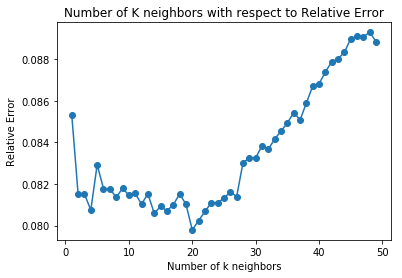

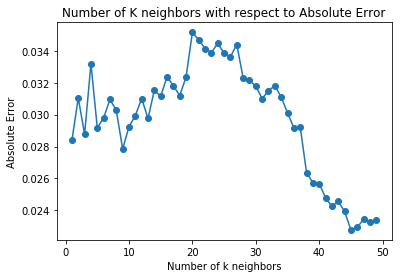

Relative Error of KNN Imputation-->  0.07979131135758795
Absolute Error of KNN Imputation-->  0.035175727403909
Relative Error of Mean Imputation-->  0.08994483936859986
Absolute Error of Mean Imputation-->  0.02259939516129037
Relative Error of Median Imputation-->  0.06797874497878177
Absolute Error of Median Imputation-->  0.03798237903225793
Relative Error of most frequent Imputation-->  0.252376759446745
Absolute Error of most frequent Imputation-->  0.9500361290322589


In [17]:
# Imputation of dataset when 20% values are missing

x = orig_dataset.values
y = unimputed_dataset_50.values

# Imputation using Mice

imp = mice_imputation(y)
relative_error_mice = RelativeError(x,imp)
AbsoluteError_mice  = AbsoluteError(x,imp)
print("Relative Error of mice Imputation-->  " +  str(relative_error_mice))
print("Absolute Error of mice Imputation-->  " +  str(AbsoluteError_mice))



# Imputation using KNN


imp_knn = knn_imputation(x,y)
relative_error_Knn = RelativeError(x,imp_knn)
AbsoluteError_Knn  = AbsoluteError(x,imp_knn)
print("Relative Error of KNN Imputation-->  " +  str(relative_error_Knn))
print("Absolute Error of KNN Imputation-->  " +  str(AbsoluteError_Knn))


# mean imputation and errors

mean_imputation = mean_imputation(y)
relative_error_mean = RelativeError(x,mean_imputation)
AbsoluteError_mean  = AbsoluteError(x,mean_imputation)
print("Relative Error of Mean Imputation-->  " +str(relative_error_mean))
print("Absolute Error of Mean Imputation-->  " +str(AbsoluteError_mean))

# Median imputation and errors

median_imputation = median_imputation(y)
relative_error_median = RelativeError(x,median_imputation)
AbsoluteError_median  = AbsoluteError(x,median_imputation)
print("Relative Error of Median Imputation-->  " +  str(relative_error_median))
print("Absolute Error of Median Imputation-->  " +  str(AbsoluteError_median))


# Most Frequent Imputation 

most_frequent_imputation  = most_frequent_imputation(y)
relative_error = RelativeError(x,most_frequent_imputation)
AbsoluteError  = AbsoluteError(x,most_frequent_imputation)
print("Relative Error of most frequent Imputation-->  " +  str(relative_error))
print("Absolute Error of most frequent Imputation-->  " +  str(AbsoluteError))


In [45]:
# Coverting numpy array into dataframes

lables = orig_dataset.columns

mice = pd.DataFrame(imp , columns = lables)
mice.to_csv('mice.csv', index = False)
knn  = pd.DataFrame(imp_knn ,columns = lables)
knn.to_csv('knn.csv', index = False)
mean = pd.DataFrame(mean_imputation ,columns = lables)
mean.to_csv('mean.csv', index = False)
median = pd.DataFrame(median_imputation,columns = lables)
median.to_csv('median.csv', index = False)
most_frequent = pd.DataFrame(most_frequent_imputation,columns = lables)
most_frequent.to_csv('most_frequent.csv', index = False)

(0, 0.3)

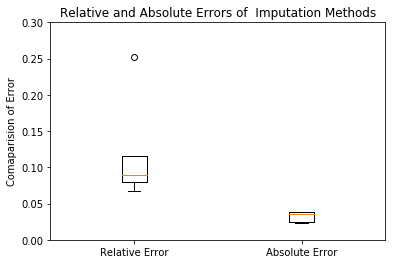

In [78]:
# Plotting boxplot for the different imputation methods

f1 = [relative_error_mice,relative_error_Knn,relative_error_mean,relative_error_median,relative_error]
f2 = [AbsoluteError_mice,AbsoluteError_Knn,AbsoluteError_mean,AbsoluteError_median,AbsoluteError]

df1 = pd.DataFrame(f1)
df2 = pd.DataFrame(f2)
df1.columns = ['Relative Error']
df2.columns = ['Absolute Error']

fig, ax = plt.subplots()
ax.boxplot([df1['Relative Error'], df2['Absolute Error']], positions=[1, 2])
ax.set_xticklabels(['Relative Error', 'Absolute Error'])
ax.set_title("Relative and Absolute Errors of  Imputation Methods");
ax.set_ylabel('Comaparision of Error')
ax.set_ylim([0, 0.3])